In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data3 = pd.read_csv('house3.csv')

In [3]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  int64  
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade         

In [4]:
data3.drop(columns='ID',inplace=True)

In [5]:
data3['Condition of the House'].head(10)

0         Fair
1         Fair
2         Fair
3    Excellent
4         Fair
5         Fair
6         Fair
7         Fair
8         Fair
9         Fair
Name: Condition of the House, dtype: object

In [6]:
data3['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<AxesSubplot:xlabel='Condition of the House'>

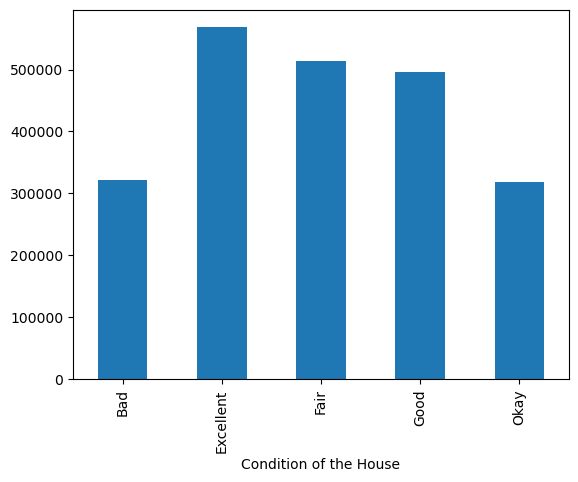

In [7]:
data3.groupby('Condition of the House',)['Sale Price'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Condition of the House'>

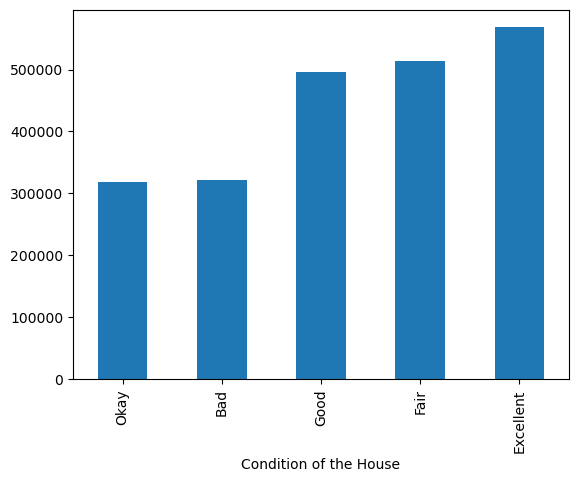

In [8]:
data3.groupby('Condition of the House',
             )['Sale Price'].mean().sort_values().plot(kind ='bar')

<AxesSubplot:xlabel='Waterfront View'>

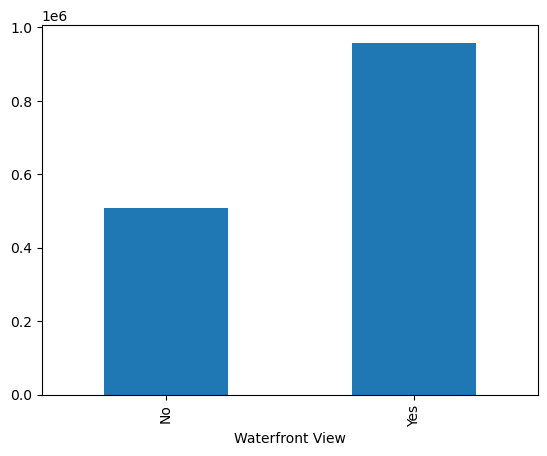

In [9]:
data3.groupby('Waterfront View',
             )['Sale Price'].mean().sort_values().plot(kind ='bar')

<AxesSubplot:xlabel='Ever Renovated'>

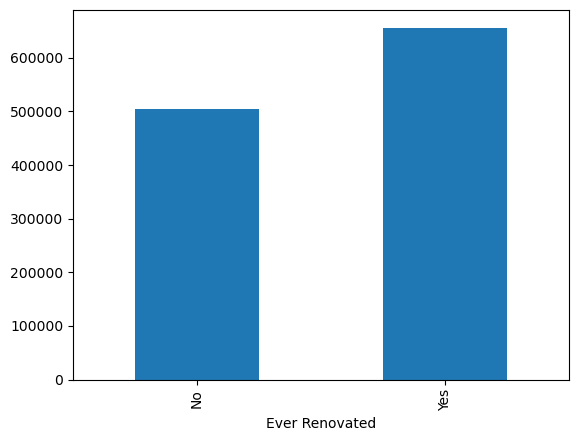

In [10]:
data3.groupby('Ever Renovated',
             )['Sale Price'].mean().sort_values().plot(kind ='bar')

<AxesSubplot:xlabel='Zipcode'>

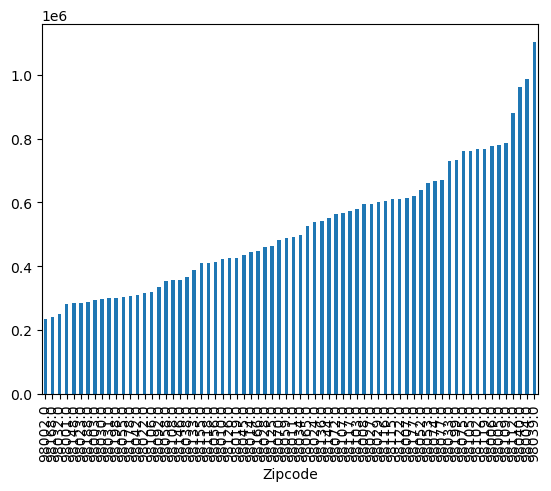

In [11]:
data3.groupby('Zipcode',
             )['Sale Price'].mean().sort_values().plot(kind ='bar')

In [12]:
#anova

In [13]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [14]:
data3=data3.rename(columns={'Sale Price':'Sale_Price'})

In [15]:
data3=data3.rename(columns={'Condition of the House':'Condition_of_the_House'})

In [16]:
data3=data3.rename(columns={'Ever Renovated':'Ever_Renovated'})

In [17]:
data3=data3.rename(columns={'Waterfront View':'Waterfront_View'})

In [18]:
data3.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Years Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [19]:
data3['Waterfront_View'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
mod=ols('Sale_Price ~ Condition_of_the_House',data=data3).fit()

In [21]:
Anova_table=sm.stats.anova_lm(mod,typ=2)

In [22]:
print(Anova_table)

                              sum_sq       df         F        PR(>F)
Condition_of_the_House  1.441831e+13      4.0  58.25563  5.447605e-49
Residual                1.336752e+15  21604.0       NaN           NaN


In [23]:
mod=ols('Sale_Price ~ Waterfront_View',data=data3).fit()

In [24]:
Anova_table=sm.stats.anova_lm(mod,typ=2)

In [25]:
print(Anova_table)

                       sum_sq       df           F         PR(>F)
Waterfront_View  3.283737e+13      1.0  538.192683  1.275558e-117
Residual         1.318333e+15  21607.0         NaN            NaN


In [26]:
mod=ols('Sale_Price ~ Ever_Renovated',data=data3).fit()

In [27]:
Anova_table=sm.stats.anova_lm(mod,typ=2)

In [28]:
print(Anova_table)

                      sum_sq       df           F        PR(>F)
Ever_Renovated  1.998463e+13      1.0  324.378469  5.419055e-72
Residual        1.331185e+15  21607.0         NaN           NaN


In [29]:
mod=ols('Sale_Price ~ Zipcode',data=data3).fit()

In [30]:
Anova_table=sm.stats.anova_lm(mod,typ=2)

In [31]:
print(Anova_table)

                sum_sq       df          F        PR(>F)
Zipcode   2.503765e+12      1.0  40.112844  2.444308e-10
Residual  1.348666e+15  21607.0        NaN           NaN


In [32]:
# dummy variable

In [33]:
data3=pd.get_dummies(data3,columns=['Condition_of_the_House'],drop_first=True)

In [34]:
data3.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,7,1180.0,...,47.5112,-122.257,1340.0,5650,No,0,0,1,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,7,2170.0,...,47.7210,-122.319,1690.0,7639,Yes,26,0,1,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,6,770.0,...,47.7379,-122.233,2720.0,8062,No,0,0,1,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,7,1050.0,...,47.5208,-122.393,1360.0,5000,No,0,1,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,8,1680.0,...,47.6168,-122.045,1800.0,7503,No,0,0,1,0,0


In [35]:
data3=pd.get_dummies(data3,
                    columns=['Waterfront_View','Ever_Renovated'],
                    drop_first=True)

In [36]:
data3.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,-122.257,1340.0,5650,0,0,1,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,-122.319,1690.0,7639,26,0,1,0,0,0,1
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,-122.233,2720.0,8062,0,0,1,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,-122.393,1360.0,5000,0,1,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,-122.045,1800.0,7503,0,0,1,0,0,0,0


# Binning

In [37]:
Zip_table=data3.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price',ascending=True)

In [38]:
Zip_table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [39]:
Zip_table['Zipcode_Group']=pd.cut(Zip_table['Sale_Price'],bins=10,
                                 labels=['Zipcode_Group_0',
                                         'Zipcode_Group_1',
                                         'Zipcode_Group_2',
                                         'Zipcode_Group_3',
                                         'Zipcode_Group_4',
                                         'Zipcode_Group_5',
                                         'Zipcode_Group_6',
                                        'Zipcode_Group_7',
                                         'Zipcode_Group_8',
                                         'Zipcode_Group_9'],
                                  include_lowest=True)

In [40]:
Zip_table = Zip_table.drop(columns='Sale_Price')

In [41]:
data3=pd.merge(data3,
              Zip_table,
              left_on='Zipcode',
              how='left',
              right_index=True)

In [42]:
data3=data3.drop(columns='Zipcode')

In [43]:
data3.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes,Zipcode_Group
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,1340.0,5650,0,0,1,0,0,0,0,Zipcode_Group_0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1690.0,7639,26,0,1,0,0,0,1,Zipcode_Group_2
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,2720.0,8062,0,0,1,0,0,0,0,Zipcode_Group_2
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,1360.0,5000,0,1,0,0,0,0,0,Zipcode_Group_3
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,1800.0,7503,0,0,1,0,0,0,0,Zipcode_Group_4


In [44]:
data3=pd.get_dummies(data3,
                    columns = ['Zipcode_Group'],
                     drop_first=True)

In [45]:
data3.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [46]:
data3.head(5)

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# y for dependent variable,x for independent variable

In [47]:
Y = data3.iloc[:,0]

In [48]:
X = data3.iloc[:,1:31]

In [49]:
X.head(5)

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,...,0,0,0,0,0,0,0,0,0,0
1,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,...,1,0,1,0,0,0,0,0,0,0
2,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,...,0,0,1,0,0,0,0,0,0,0
3,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,...,0,0,0,1,0,0,0,0,0,0
4,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,...,0,0,0,0,1,0,0,0,0,0


In [50]:
Y.head(5)

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: Sale_Price, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X ,Y ,test_size=0.3)

In [53]:
X_train.shape

(15126, 30)

In [54]:
X_test.shape

(6483, 30)

In [55]:
Y_train.shape

(15126,)

In [56]:
Y_test.shape

(6483,)

In [ ]:
#standardisation

In [58]:
from sklearn import preprocessing
scale=preprocessing.StandardScaler()

In [59]:
X_train = scale.fit_transform(X_train)

In [60]:
X_train

array([[-0.39829851,  0.50567969,  0.48409219, ..., -0.11248619,
        -0.16565604, -0.05018523],
       [-0.39829851, -0.47520143, -0.81858526, ..., -0.11248619,
        -0.16565604, -0.05018523],
       [ 0.66952553,  0.50567969, -0.22745432, ..., -0.11248619,
        -0.16565604, -0.05018523],
       ...,
       [-1.46612254, -1.45608255, -1.35498186, ..., -0.11248619,
        -0.16565604, -0.05018523],
       [ 0.66952553,  0.83264006,  1.17374495, ..., -0.11248619,
        -0.16565604, -0.05018523],
       [-0.39829851, -1.45608255, -0.65438222, ..., -0.11248619,
        -0.16565604, -0.05018523]])

In [61]:
X_test = scale.fit_transform(X_test)

In [62]:
X_test

array([[-0.3998314 , -0.47004395, -0.61191593, ..., -0.1117772 ,
        -0.17610068, -0.04306306],
       [-1.49354741, -1.4283128 , -1.17783304, ..., -0.1117772 ,
        -0.17610068, -0.04306306],
       [ 0.69388462,  0.80764785,  1.13532626, ..., -0.1117772 ,
        -0.17610068, -0.04306306],
       ...,
       [ 0.69388462, -0.47004395, -0.19877492, ..., -0.1117772 ,
        -0.17610068, -0.04306306],
       [-0.3998314 , -1.4283128 , -1.10252088, ..., -0.1117772 ,
        -0.17610068, -0.04306306],
       [ 1.78760063,  0.80764785,  0.46827567, ..., -0.1117772 ,
         5.6785697 , -0.04306306]])